<a href="https://colab.research.google.com/github/JJang770/GitHub_tutorial/blob/main/pytorch/2_PyTorch_with_TORCHVISION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


# Torch vision example
Source: https://www.learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/

In [2]:
import numpy as np

In [3]:
from torchvision import models
import torch

# Let us look at the Deep learning architectures implemented in the torch vision library.
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

Notice that there is one entry called **AlexNet** and one called **alexnet**. The capitalised name refers to the Python class (AlexNet) whereas alexnet is a convenience function that returns the model instantiated from the AlexNet class.

In [4]:
alexnet = models.alexnet(pretrained=True) # This will download the weights for the network first time it is run!
alexnet

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 121MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

width:600, height=400


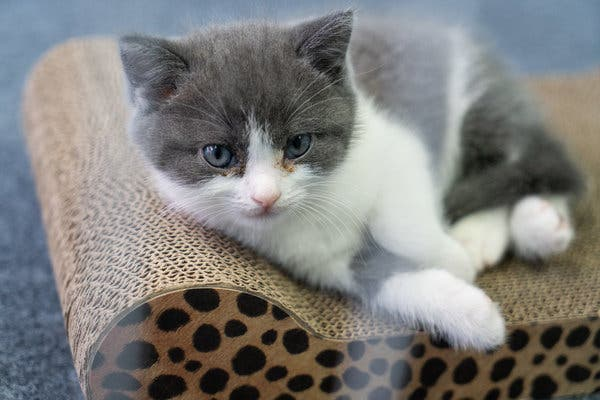

In [5]:
from PIL import Image
from skimage import io, transform
import matplotlib.pyplot as plt

img_path_cat='/content/drive/MyDrive/fastcampus_vision/img2/cat.jpg'
img_path_hamster='/content/drive/MyDrive/fastcampus_vision/img2/hamster.jpg'
img_path_centipede='/content/drive/MyDrive/fastcampus_vision/img2/centipede.jpg'

# img = io.imread(img_path_cat)
img = Image.open(img_path_cat)
#img = Image.open(img_path_hamster)
#img = Image.open(img_path_centipede)
#plt.imshow(img)
print(f'width:{img.width}, height={img.height}')
img


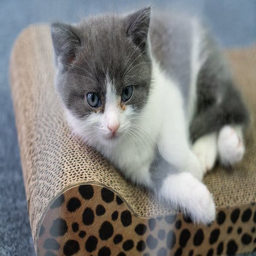

In [6]:
s = 255
img.resize((256,256))

In [7]:
print(f'img size:{img.size}, shape:{np.array(img).shape}')
print(img.getchannel(0))

img size:(600, 400), shape:(400, 600, 3)
<PIL.Image.Image image mode=L size=600x400 at 0x7A22CD306F20>


In [8]:
from torchvision import transforms
transform = transforms.Compose([        # Defining a variable transforms
 transforms.Resize(256),                # Resize the image to 256×256 pixels
 transforms.CenterCrop(224),            # Crop the image to 224×224 pixels about the center
 transforms.ToTensor(),                 # Convert the image to PyTorch Tensor data type
 transforms.Normalize(                  # Normalize the image
 mean=[0.485, 0.456, 0.406],            # Mean and std of image as also used when training the network
 std=[0.229, 0.224, 0.225]
 )])

In [9]:
img_t = transform(img)
img_t.shape

torch.Size([3, 224, 224])

In [10]:
batch_t = torch.unsqueeze(img_t, 0)

In [11]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [12]:
out = alexnet(batch_t)
out.shape

torch.Size([1, 1000])

In [ ]:
with open('/content/drive/MyDrive/fastcampus_vision/img2/imagenet_classes.txt') as f:
  classes = [line.strip() for line in f.readlines()]
print("Number of classes: {}".format(len(classes)))
classes

In [14]:
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(classes[idx], percentage[idx].item()) for idx in indices[0][:10]]

[('Persian cat', 78.3370132446289),
 ('tabby, tabby cat', 5.557599067687988),
 ('tiger cat', 3.906733274459839),
 ('hamper', 2.165001392364502),
 ('remote control, remote', 1.3410416841506958),
 ('Egyptian cat', 1.3156216144561768),
 ('Angora, Angora rabbit', 0.9337761402130127),
 ('Pomeranian', 0.9232204556465149),
 ('black-footed ferret, ferret, Mustela nigripes', 0.6649999022483826),
 ('washer, automatic washer, washing machine', 0.6520257592201233)]